In [1]:
%matplotlib inline

In [282]:
import geopandas as gp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = 12, 8

In [240]:
df = gp.read_file('../landfill_geojson.geojson')

In [241]:
df.head()

,area,fac_name,fac_state,fac_street,geometry,id,task_id,task_run__created,task_run__finish_time,task_run__id,task_run__user_ip,task_runinfo__certain,task_runinfo__skip,task_user_id
0,74336.879239,AMERICAN DISPOSAL INC,RI,23 GREEN HILL RD,POLYGON ((-71.52917097350966 41.79511484405755...,OpenLayers_Feature_Vector_340,501701,2014-04-11T18:02:24.061996,2014-04-11T18:02:24.062013,629898,None,0,0,4038
1,8977.979795,AMERICAN DISPOSAL INC,RI,23 GREEN HILL RD,"POLYGON ((-71.5351442529862 41.79629064209585,...",OpenLayers_Feature_Vector_333,501701,2014-04-11T18:02:56.660754,2014-04-11T18:02:56.660769,629899,216.165.95.69,-1,0,None
2,1275812.214490,AMERICAN DISPOSAL INC,RI,23 GREEN HILL RD,POLYGON ((-71.54515693923918 41.80168943778234...,OpenLayers_Feature_Vector_316,501701,2014-04-11T18:03:09.583790,2014-04-11T18:03:09.583808,629900,None,1,0,5
3,300607.715762,ASTI WASTE SYSTEMS,CT,182-2 DANBURY RD,"POLYGON ((-73.42464753303524 41.5462933224311,...",OpenLayers_Feature_Vector_735,501703,2014-04-11T18:03:58.458460,2014-04-11T18:03:58.458477,629903,216.165.95.69,-1,0,None
4,1114961.938569,AMERICAN DISPOSAL INC,RI,23 GREEN HILL RD,"POLYGON ((-71.5342107371843 41.81284982596986,...",OpenLayers_Feature_Vector_521,501701,2014-04-11T18:03:58.556272,2014-04-11T18:03:58.556288,629904,216.165.95.70,-1,0,None


In [242]:
df.shape

(1024, 14)

In [243]:
ip_users = df['task_run__user_ip'].value_counts()[1:]

In [244]:
id_users = df['task_user_id'].value_counts().drop('None')

In [267]:
users.head()

0    530
1     47
2     37
3     30
4     24
dtype: int64

In [279]:
users = pd.concat([ip_users, id_users])
users = users.order(ascending=False)#.plot()
users.reset_index(drop=True, inplace=True)

In [301]:
x, y = np.histogram(users, bins=100)

In [294]:
x,y

(array([76,  7,  3,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1]),
 array([   1.  ,   11.58,   22.16,   32.74,   43.32,   53.9 ,   64.48,
          75.06,   85.64,   96.22,  106.8 ,  117.38,  127.96,  138.54,
         149.12,  159.7 ,  170.28,  180.86,  191.44,  202.02,  212.6 ,
         223.18,  233.76,  244.34,  254.92,  265.5 ,  276.08,  286.66,
         297.24,  307.82,  318.4 ,  328.98,  339.56,  350.14,  360.72,
         371.3 ,  381.88,  392.46,  403.04,  413.62,  424.2 ,  434.78,
         445.36,  455.94,  466.52,  477.1 ,  487.68,  498.26,  508.84,
         519.42,  530.  ]))

(0, 50)

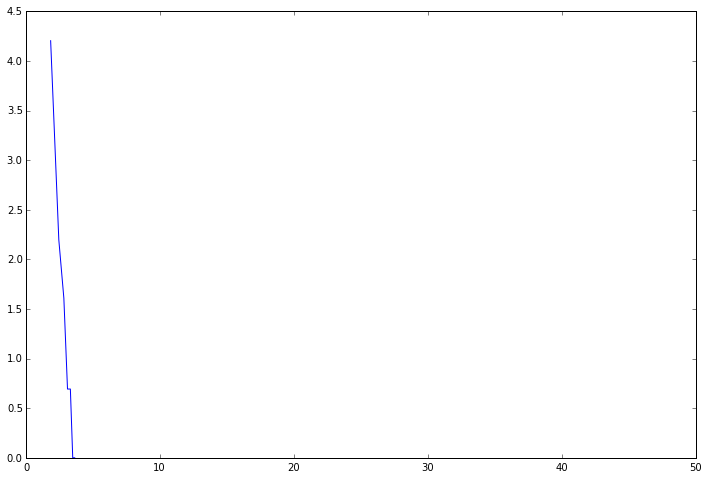

In [305]:
plt.plot(np.log(y[1:]), np.log(x))
plt.xlim(0,50)

In [307]:
np.sqrt(1010025)

1005.0

In [310]:
(5300004 ** (1. / 3))**2

30398.40509869635

In [313]:
(18433779281 ** (1./3))

2641.62679430354

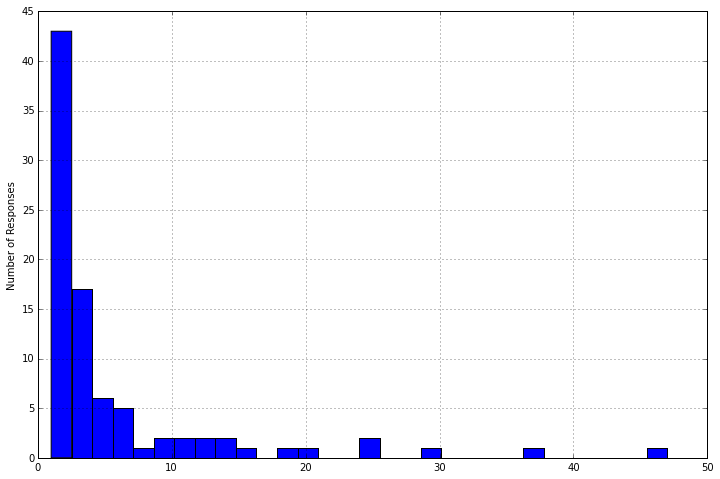

In [278]:
users[1:].plot(kind='hist', bins=30, logx=False, logy=False)
plt.grid()
plt.xlabel('')
plt.ylabel('Number of Responses')
#.order(ascending=True).plot(logy=True)

In [110]:
ip_d_mean = df.groupby('task_run__user_ip')['duration'].mean()
id_d_mean = df.groupby('task_user_id')['duration'].mean()

In [113]:
pd.concat([ip_d_mean, id_d_mean])

52.483467179876641

In [320]:
df['task_run__user_ip'].value_counts().sum()

1024

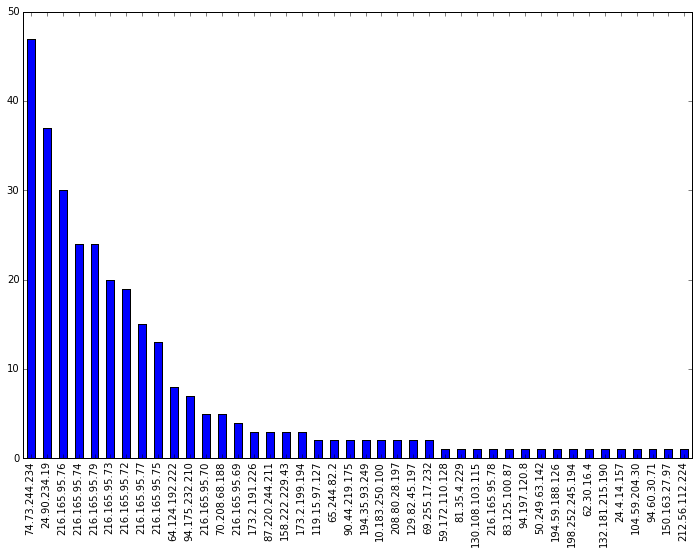

In [318]:
fig, axes = plt.subplots(1)
(df['task_run__user_ip'].value_counts()[1:]).plot(kind='bar', ax=axes)


In [49]:
len(df)

1024

In [18]:
df.head()

,area,fac_name,fac_state,fac_street,geometry,id,task_id,task_run__created,task_run__finish_time,task_run__id,task_run__user_ip,task_runinfo__certain,task_runinfo__skip,task_user_id
0,74336.879239,AMERICAN DISPOSAL INC,RI,23 GREEN HILL RD,POLYGON ((-71.52917097350966 41.79511484405755...,OpenLayers_Feature_Vector_340,501701,2014-04-11T18:02:24.061996,2014-04-11T18:02:24.062013,629898,None,0,0,4038
1,8977.979795,AMERICAN DISPOSAL INC,RI,23 GREEN HILL RD,"POLYGON ((-71.5351442529862 41.79629064209585,...",OpenLayers_Feature_Vector_333,501701,2014-04-11T18:02:56.660754,2014-04-11T18:02:56.660769,629899,216.165.95.69,-1,0,None
2,1275812.214490,AMERICAN DISPOSAL INC,RI,23 GREEN HILL RD,POLYGON ((-71.54515693923918 41.80168943778234...,OpenLayers_Feature_Vector_316,501701,2014-04-11T18:03:09.583790,2014-04-11T18:03:09.583808,629900,None,1,0,5
3,300607.715762,ASTI WASTE SYSTEMS,CT,182-2 DANBURY RD,"POLYGON ((-73.42464753303524 41.5462933224311,...",OpenLayers_Feature_Vector_735,501703,2014-04-11T18:03:58.458460,2014-04-11T18:03:58.458477,629903,216.165.95.69,-1,0,None
4,1114961.938569,AMERICAN DISPOSAL INC,RI,23 GREEN HILL RD,"POLYGON ((-71.5342107371843 41.81284982596986,...",OpenLayers_Feature_Vector_521,501701,2014-04-11T18:03:58.556272,2014-04-11T18:03:58.556288,629904,216.165.95.70,-1,0,None


In [98]:
df['task_runinfo__skip'].value_counts()

0    1024
dtype: int64

In [97]:
df['task_runinfo__certain'].value_counts() / len(df)

-1    0.490234
 1    0.369141
 0    0.140625
dtype: float64

In [134]:
df['task_run__created'] = pd.to_datetime(df['task_run__created'], unit='s')
df['task_run__finish_time'] = pd.to_datetime(df['task_run__finish_time'], unit='s')

In [135]:
df['duration'] = (df['task_run__finish_time'] - df['task_run__created'])

In [165]:
f = (df['duration'][:957].astype('timedelta64[ns]') *1000000).astype('timedelta64[s]')

In [174]:
s = (df['duration'][957:].astype('timedelta64[s]') * 0.1)

In [182]:
import numpy as np

In [183]:
np.sqrt(1024)

32.0

In [186]:
pd.concat([f,s]).describe()

count    1024.000000
mean       20.970898
std         7.842791
min         2.400000
25%        17.000000
50%        20.000000
75%        23.000000
max        78.200000
Name: duration, dtype: float64

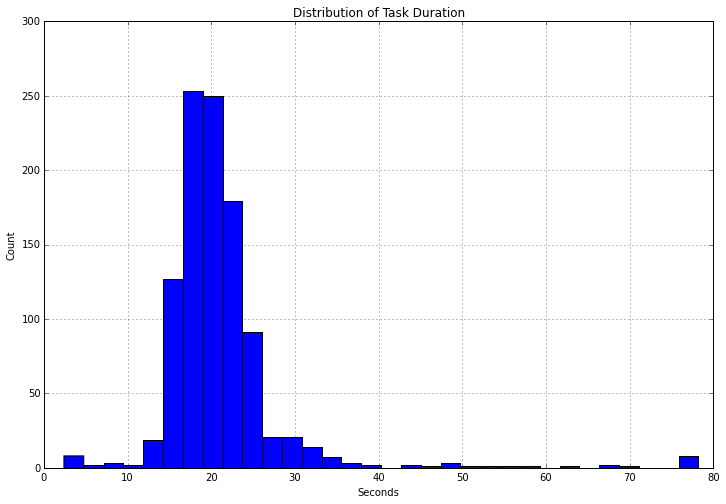

In [188]:
pd.concat([f,s]).hist(bins=32, zorder=3)
plt.xlabel('Seconds')
plt.ylabel('Count')
plt.title('Distribution of Task Duration')

In [114]:
df['duration'].describe()

count    1024.000000
mean       14.455078
std        68.571316
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       782.000000
Name: duration, dtype: float64

In [124]:
df['task_run__finish_time'].head()

0    2014-04-11T18:02:24.062013
1    2014-04-11T18:02:56.660769
2    2014-04-11T18:03:09.583808
3    2014-04-11T18:03:58.458477
4    2014-04-11T18:03:58.556288
Name: task_run__finish_time, dtype: object

In [126]:
df.index = pd.to_datetime(df['task_run__created'], unit='ns')

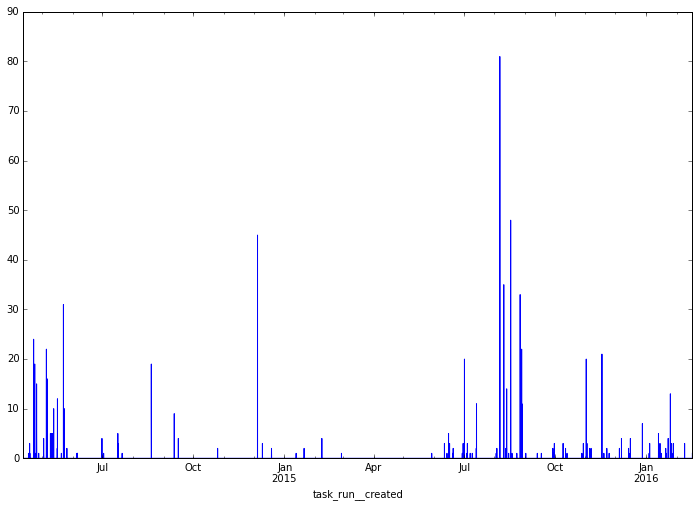

In [132]:
df['task_run__finish_time'].resample('H', how='count').plot()

In [117]:
df['duration']

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
       ... 
994     285
995      31
996     276
997     316
998      80
999     186
1000    155
1001    341
1002    341
1003     47
1004    131
1005    175
1006     43
1007    155
1008    518
1009    666
1010    666
1011    210
1012    105
1013    141
1014    141
1015    141
1016    782
1017    367
1018    110
1019     33
1020    158
1021    175
1022    175
1023     77
Name: duration, dtype: float64

In [44]:
l[l>0].median()

175.0

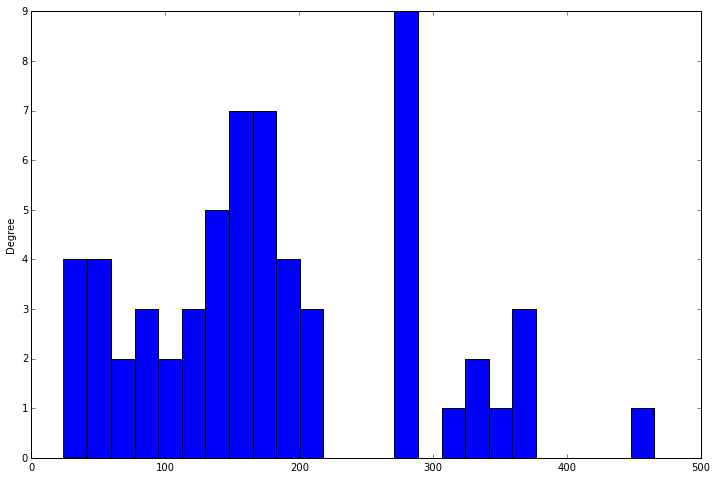

In [106]:
l[(l > 0) & (l < 500)].plot(kind='hist', bins=25)

## Task time

In [9]:
import as

In [60]:
data = pd.read_csv('../landfill_task_run.csv', error_bad_lines=False)

Skipping line 642: expected 20 fields, saw 21



In [63]:
data.head()

,task_run__calibration,task_run__created,task_run__finish_time,task_run__id,task_run__info,task_run__project_id,task_run__task_id,task_run__timeout,task_run__user_id,task_run__user_ip,task_runinfo__Days_Since_Last_Inspection,task_runinfo__Facility_Name,task_runinfo__Facility_State,task_runinfo__Facility_Street,task_runinfo__X_id,task_runinfo__area,task_runinfo__certain,task_runinfo__multiple,task_runinfo__skip,task_runinfo__task_id
0,None,2014-04-11T18:02:24.061996,2014-04-11T18:02:24.062013,629898,"{""X_id"": ""ObjectID(52605256cdc3fd11fee7714c)"",...",1402,501701,None,4038,None,never,AMERICAN DISPOSAL INC,RI,23 GREEN HILL RD,ObjectID(52605256cdc3fd11fee7714c),"[{u'area': 74336.87923931186, u'id': u'OpenLay...",0,0,0,501701
1,None,2014-04-11T18:02:56.660754,2014-04-11T18:02:56.660769,629899,"{""X_id"": ""ObjectID(52605256cdc3fd11fee7714c)"",...",1402,501701,None,None,216.165.95.69,never,AMERICAN DISPOSAL INC,RI,23 GREEN HILL RD,ObjectID(52605256cdc3fd11fee7714c),"[{u'area': 8977.97979489246, u'id': u'OpenLaye...",-1,0,0,501701
2,None,2014-04-11T18:03:09.583790,2014-04-11T18:03:09.583808,629900,"{""X_id"": ""ObjectID(52605256cdc3fd11fee7714c)"",...",1402,501701,None,5,None,never,AMERICAN DISPOSAL INC,RI,23 GREEN HILL RD,ObjectID(52605256cdc3fd11fee7714c),"[{u'area': 1275812.2144902814, u'id': u'OpenLa...",1,0,0,501701
3,None,2014-04-11T18:03:18.873345,2014-04-11T18:03:18.873363,629901,"{""X_id"": ""ObjectID(52605256cdc3fd11fee7714d)"",...",1402,501702,None,None,216.165.95.69,3266,AMHERST LANDFILL - NEW,MA,740 BELCHERTOWN RD,ObjectID(52605256cdc3fd11fee7714d),0,-1,0,1,501702
4,None,2014-04-11T18:03:37.599809,2014-04-11T18:03:37.599828,629902,"{""X_id"": ""ObjectID(52605256cdc3fd11fee7714c)"",...",1402,501701,None,4039,None,never,AMERICAN DISPOSAL INC,RI,23 GREEN HILL RD,ObjectID(52605256cdc3fd11fee7714c),0,-1,0,1,501701


In [68]:
data_res = {'skip':[], 'certain':[],'Days_Since_Last_Inspection':[], 'task_run_created':[],'task_run__finish_time':[]}
def f(x):
    #print x
    a = ast.literal_eval(x['task_run__info'])
    data_res['skip'].append(a['skip'])
    data_res['certain'].append(a['certain'])
    data_res['Days_Since_Last_Inspection'].append(a['Days_Since_Last_Inspection'])
    data_res['task_run_created'].append(x['task_run__created'])
    data_res['task_run__finish_time'].append(x['task_run__finish_time'])
    #x['task_run__info'].map(lambda x: ast.literal_eval(x))

In [69]:
data.apply(f, axis=1)

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
1852    None
1853    None
1854    None
1855    None
1856    None
1857    None
1858    None
1859    None
1860    None
1861    None
1862    None
1863    None
1864    None
1865    None
1866    None
1867    None
1868    None
1869    None
1870    None
1871    None
1872    None
1873    None
1874    None
1875    None
1876    None
1877    None
1878    None
1879    None
1880    None
1881    None
dtype: object

In [97]:
results = pd.DataFrame(data_res)

In [99]:
results['task_run__finish_time'] = pd.to_datetime(results['task_run__finish_time'], unit='s')
results['task_run_created'] = pd.to_datetime(results['task_run_created'], unit='s')

results['duration'] = results['task_run__finish_time'] - results['task_run_created']

In [142]:
f = ((results['duration'][:1672].astype('timedelta64[ns]') *1000000)).astype('timedelta64[s]')

In [155]:
g = (results['duration'][1672:].astype('timedelta64[s]'))

In [162]:
f = (f*f *0.1)

In [163]:
duration = pd.concat([f,g], axis=0)

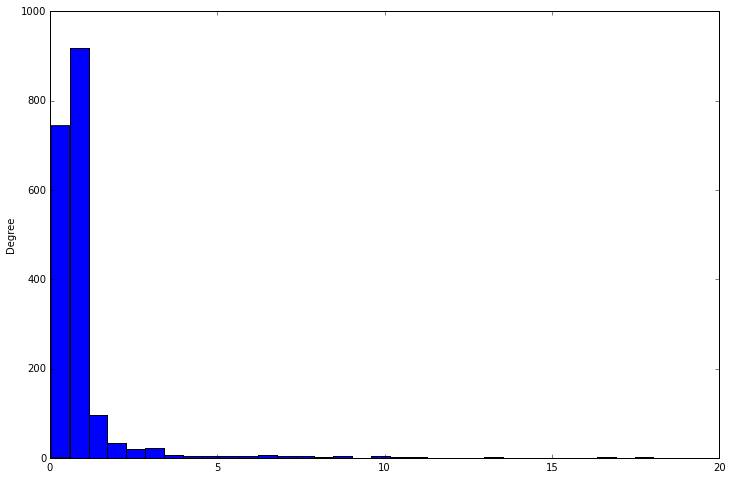

In [170]:
((duration) /60).plot(kind='hist', bins=32)

In [172]:
results['duration_mod'] = duration

In [177]:
results.head()

,Days_Since_Last_Inspection,certain,skip,task_run__finish_time,task_run_created,duration,duration_mod
0,never,0,0,2014-04-11 18:02:24.062013,2014-04-11 18:02:24.061996,00:00:00.000017,28.9
1,never,-1,0,2014-04-11 18:02:56.660769,2014-04-11 18:02:56.660754,00:00:00.000015,22.5
2,never,1,0,2014-04-11 18:03:09.583808,2014-04-11 18:03:09.583790,00:00:00.000018,32.4
3,3266,-1,1,2014-04-11 18:03:18.873363,2014-04-11 18:03:18.873345,00:00:00.000018,32.4
4,never,-1,1,2014-04-11 18:03:37.599828,2014-04-11 18:03:37.599809,00:00:00.000019,36.1


In [239]:
results['duration_mod'].median()

40.0

In [315]:
(results['duration_mod']/60).sum() /60

28.875166666666662

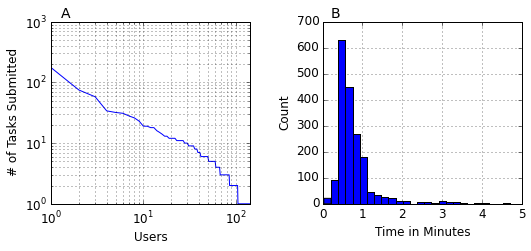

In [350]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

data = pd.read_csv('../landfill_task_run.csv', error_bad_lines=False)
k = data[data['task_run__user_id'] != 'None']['task_run__user_id'].value_counts()
j = data[data['task_run__user_ip'] != 'None']['task_run__user_ip'].value_counts()
t = pd.concat([k,j], axis=0).order(ascending=False)

(results['duration_mod']/60).plot(kind='hist',bins=100, xlim=(0,5), zorder=3, fontsize=12, ax=axes[1])
axes[1].grid()
axes[1].set_xlabel('Time in Minutes', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)

t.reset_index()[0].plot(ax=axes[0], logy=True, logx=True, fontsize=12)

axes[0].set_ylabel('# of Tasks Submitted', fontsize=12)
axes[0].set_xlabel('Users', fontsize=12)
axes[0].grid(which='both')
fig.tight_layout(pad=3)

axes[0].annotate('A', xy=(0.05,1.02), xycoords='axes fraction', 
                 horizontalalignment='left', fontsize=14)    
axes[1].annotate('B', xy=(0.05,1.02), xycoords='axes fraction', 
                 horizontalalignment='left', fontsize=14)    
plt.savefig('/Users/Gioia/Dropbox/LandfillHunter/participation.pdf', dpi=300, bbox_inches='tight')

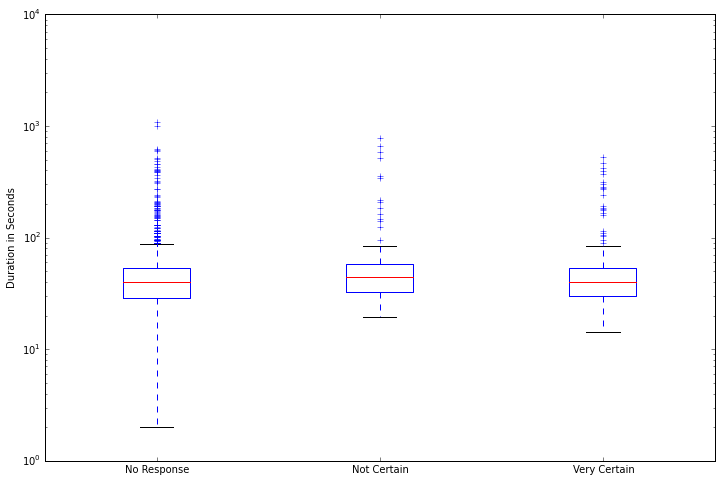

In [204]:
rs = (pd.DataFrame(gdf)).T
rs.columns = ['No Response','Not Certain','Very Certain']
rs.plot(kind='box', logy=True)
plt.ylabel('Duration in Seconds')

0
1


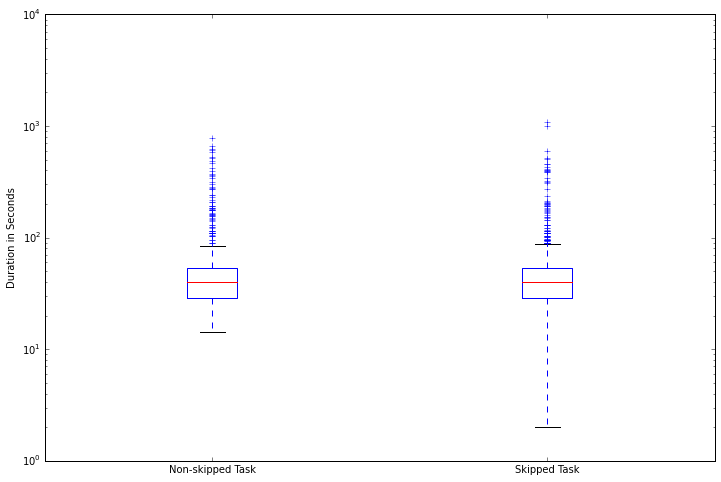

In [206]:
skip = []

for ind, val in results.groupby('skip')['duration_mod']:
    print ind
    skip.append(val)
    
rsk = (pd.DataFrame(skip)).T
rsk.columns = ['Non-skipped Task','Skipped Task']
rsk.plot(kind='box', logy=True)
plt.ylabel('Duration in Seconds')    

In [216]:
for ind, val in results.groupby('certain')['Days_Since_Last_Inspection']:
    print ind
    def g(x):
        try:
            return int(x)
        except:
            return 0
    print val.map(g).mean()


-1
1357.56756757
0
1538.96551724
1
1563.71328671
